In [1]:
import numpy as np
from PIL import Image, ImageStat
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# get paths
paths = {
    'training': '../data/training',
    'test': '../data/test',
    'gmaps': '../data/gmaps'
}

## Properties IMAGES -- averaged per image

In [14]:
# -- IMAGES --
hue_dict = {}
saturation_dict = {}
brightness_dict = {}

# iterate over image sets
for category in paths.keys():
    directory = os.path.join(paths[category], 'images')
    
    if category == 'gmaps':
        hue_list = {'all': [],
                           'filtered': []}
        saturation_list = {'all': [],
                           'filtered': []}
        brightness_list = {'all': [],
                           'filtered': []}
    else:
        hue_list = []
        saturation_list = []
        brightness_list = []
    
    for filename in tqdm(os.listdir(directory)):
        f = os.path.join(directory, filename)
        # get files
        if os.path.isfile(f):
            with Image.open(f) as im:
                im_hsv = im.convert('HSV') 
                # get image brighness
                hue = ImageStat.Stat(im_hsv).mean[0]
                saturation = ImageStat.Stat(im_hsv).mean[1]
                brightness = ImageStat.Stat(im_hsv).mean[2]
                
                # append stats
                if category == 'gmaps':
                    city = '_'.join(filename.split('_')[:-1])
                    if city not in brightness_list:
                        hue_list[city] = []
                        saturation_list[city] = []
                        brightness_list[city] = []
                    
                    hue_list[city].append(hue)
                    saturation_list[city].append(saturation)
                    brightness_list[city].append(brightness)
                    
                    hue_list['all'].append(hue)
                    saturation_list['all'].append(saturation)
                    brightness_list['all'].append(brightness)
                    
                    if brightness >= 80 and brightness < 180:
                        brightness_list['filtered'].append(brightness)
                else:
                    hue_list.append(hue)
                    saturation_list.append(saturation)
                    brightness_list.append(brightness)
                
    hue_dict[category] = hue_list
    saturation_dict[category] = saturation_list
    brightness_dict[category] = brightness_list

100%|█████████████████████████████████████████████████████████████████████████████| 12000/12000 [03:33<00:00, 56.31it/s]


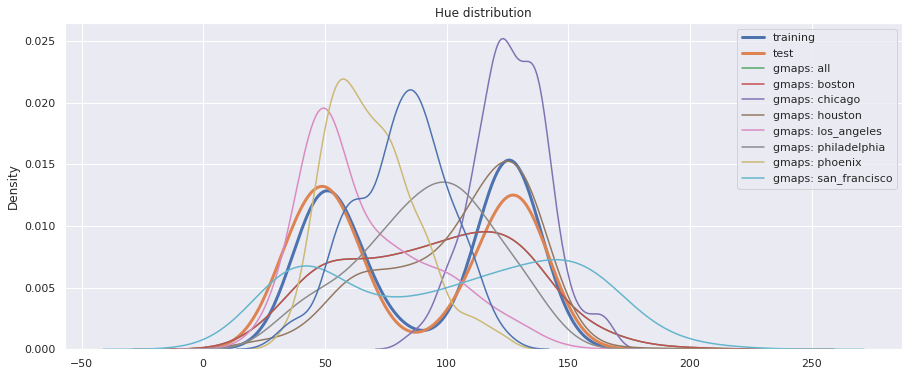

In [20]:
# Plot hue
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(15, 6)})

cities = list(hue_dict['gmaps'].keys())
cities = cities[:1] + cities[1+1:]

labels_gmaps = ['gmaps: ' + city for city in cities]

sns.kdeplot(np.array(hue_dict['training']), bw=0.3, linewidth=3)
sns.kdeplot(np.array(hue_dict['test']), bw=0.3, linewidth=3)
sns.kdeplot(np.array(hue_dict['gmaps']['all']), bw=0.3)
# sns.kdeplot(np.array(brightness_dict['gmaps']['filtered']), bw=0.3)
for city in cities:
    sns.kdeplot(np.array(hue_dict['gmaps'][city]), bw=0.3)

plt.title("Hue distribution")
plt.legend(labels=["training","test"] + labels_gmaps)
# plt.legend(labels=["training","test","gmaps: initial", "gmaps: filtered"] + labels_gmaps)

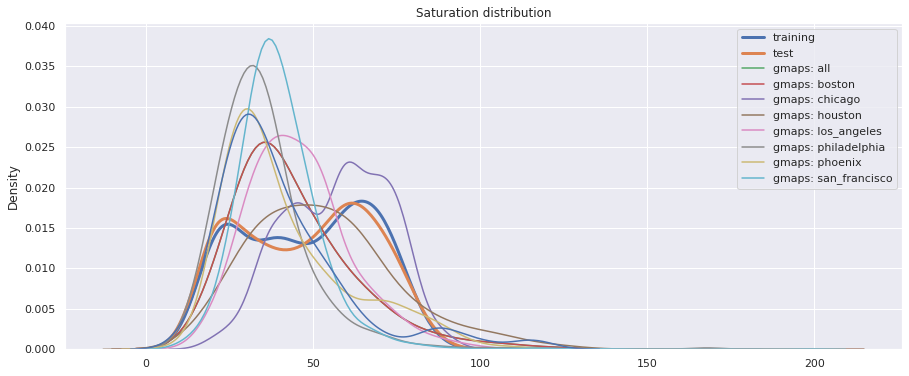

In [18]:
# Plot saturation
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(15, 6)})

cities = list(saturation_dict['gmaps'].keys())
cities = cities[:1] + cities[1+1:]

labels_gmaps = ['gmaps: ' + city for city in cities]

sns.kdeplot(np.array(saturation_dict['training']), bw=0.3, linewidth=3)
sns.kdeplot(np.array(saturation_dict['test']), bw=0.3, linewidth=3)
sns.kdeplot(np.array(saturation_dict['gmaps']['all']), bw=0.3)
# sns.kdeplot(np.array(brightness_dict['gmaps']['filtered']), bw=0.3)
for city in cities:
    sns.kdeplot(np.array(saturation_dict['gmaps'][city]), bw=0.3)

plt.title("Saturation distribution")
plt.legend(labels=["training","test"] + labels_gmaps)
# plt.legend(labels=["training","test","gmaps: initial", "gmaps: filtered"] + labels_gmaps)

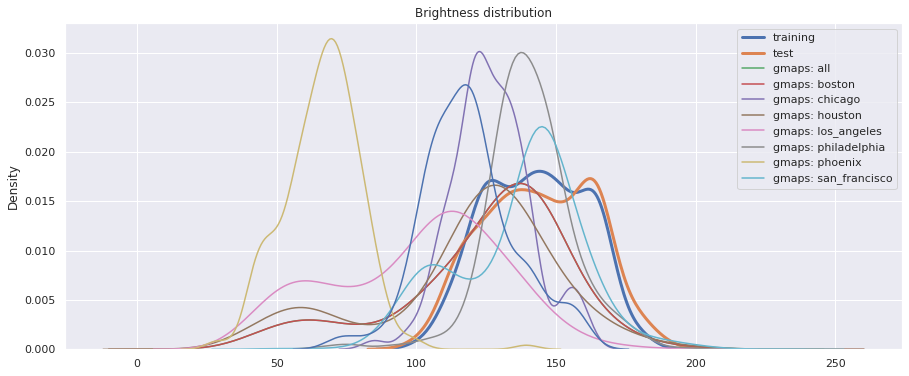

In [19]:
# Plot brighness
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(15, 6)})

cities = list(brightness_dict['gmaps'].keys())
cities = cities[:1] + cities[1+1:]

labels_gmaps = ['gmaps: ' + city for city in cities]

sns.kdeplot(np.array(brightness_dict['training']), bw=0.3, linewidth=3)
sns.kdeplot(np.array(brightness_dict['test']), bw=0.3, linewidth=3)
sns.kdeplot(np.array(brightness_dict['gmaps']['all']), bw=0.3)
# sns.kdeplot(np.array(brightness_dict['gmaps']['filtered']), bw=0.3)
for city in cities:
    sns.kdeplot(np.array(brightness_dict['gmaps'][city]), bw=0.3)

plt.title("Brightness distribution")
plt.legend(labels=["training","test"] + labels_gmaps)
# plt.legend(labels=["training","test","gmaps: initial", "gmaps: filtered"] + labels_gmaps)

## Properties IMAGES -- averaged per pixel

In [41]:
# -- IMAGES --
hue_dict = {}
saturation_dict = {}
brightness_dict = {}

# iterate over image sets
for category in paths.keys():
    directory = os.path.join(paths[category], 'images')
    
    if category == 'gmaps':
        hue_list = {'all': 0.0,
                    'filtered': 0.0}
        saturation_list = {'all': 0.0,
                           'filtered': 0.0}
        brightness_list = {'all': 0.0,
                           'filtered': 0.0}
        count = {'all': 0,
                 'filtered': 0}
    else:
        hue_list = 0.0
        saturation_list = 0.0
        brightness_list = 0.0
        count = 0
        
    for filename in tqdm(os.listdir(directory)):
        f = os.path.join(directory, filename)
        # get files
        if os.path.isfile(f):
            with Image.open(f) as im:
                im_hsv = im.convert('HSV') 
                # get image brighness
                hue = ImageStat.Stat(im_hsv).sum[0]
                saturation = ImageStat.Stat(im_hsv).sum[1]
                brightness = ImageStat.Stat(im_hsv).sum[2]
                
                # append stats
                if category == 'gmaps':
                    city = '_'.join(filename.split('_')[:-1])
                    if city not in brightness_list:
                        hue_list[city] = 0.0
                        saturation_list[city] = 0.0
                        brightness_list[city] = 0.0
                        count[city] = 0
                    
                    hue_list[city] += hue
                    saturation_list[city] += saturation
                    brightness_list[city] += brightness
                    count[city] += 1
                    
                    hue_list['all'] += hue
                    saturation_list['all'] += saturation
                    brightness_list['all'] += brightness
                    count['all'] += 1
                    
                    if brightness >= 80 and brightness < 180:
                        brightness_list['filtered'] += brightness
                        count['filtered'] += 1
                else:
                    hue_list += hue
                    saturation_list += saturation
                    brightness_list += brightness
                    count += 1
                
    if category == 'gmaps':
        hue_dict[category] = {}
        saturation_dict[category] = {}
        brightness_dict[category] = {}
        for city in brightness_list:
            if count[city] > 0:
                hue_dict[category][city] = hue_list[city] / (count[city] * 400 * 400)
                saturation_dict[category][city] = saturation_list[city] / (count[city] * 400 * 400)
                brightness_dict[category][city] = brightness_list[city] / (count[city] * 400 * 400)
            else:
                hue_dict[category][city] = hue_list[city]
                saturation_dict[category][city] = saturation_list[city]
                brightness_dict[category][city] = brightness_list[city]
    else:
        hue_dict[category] = hue_list / (count * 400 * 400)
        saturation_dict[category] = saturation_list / (count * 400 * 400)
        brightness_dict[category] = brightness_list / (count * 400 * 400)

100%|█████████████████████████████████████████████████████████████████████████████| 12000/12000 [02:53<00:00, 68.99it/s]


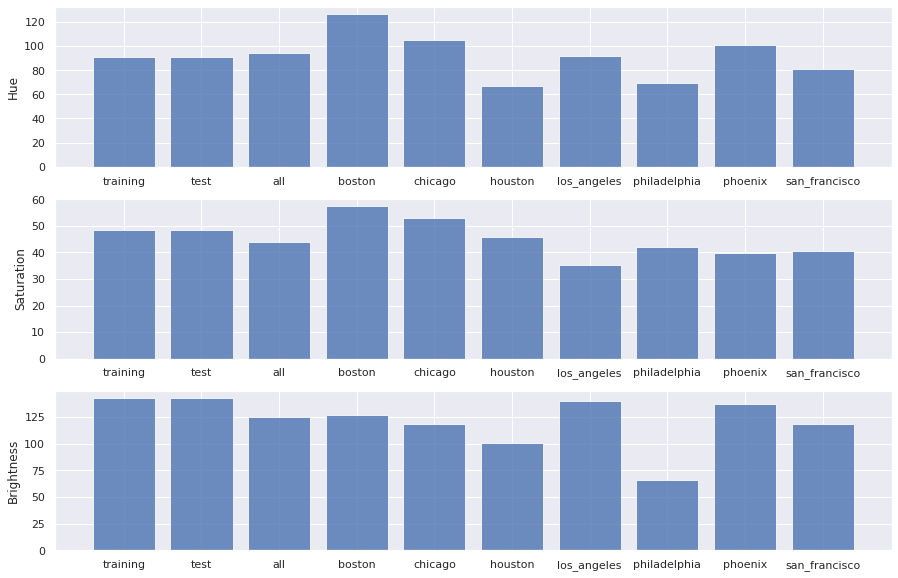

In [43]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.set_figwidth(15)
fig.set_figheight(10)

cities = list(brightness_dict['gmaps'].keys())
cities = cities[:1] + cities[1+1:]
labels_gmaps = [city for city in cities]
objects = ["training","test"] + labels_gmaps
y_pos = np.arange(len(objects))

hue = [hue_dict['training'], hue_dict['training']] + [hue_dict['gmaps'][city] for city in cities]
saturation = [saturation_dict['training'], saturation_dict['training']] + [saturation_dict['gmaps'][city] for city in cities]
brightness = [brightness_dict['training'], brightness_dict['training']] + [brightness_dict['gmaps'][city] for city in cities]

ax1.bar(y_pos, hue, align='center', alpha=0.8)
ax1.set_xticks(y_pos, minor=False)
ax1.set_xticklabels(objects, fontdict=None, minor=False)
ax1.set_ylabel('Hue')

ax2.bar(y_pos, saturation, align='center', alpha=0.8)
ax2.set_xticks(y_pos, minor=False)
ax2.set_xticklabels(objects, fontdict=None, minor=False)
ax2.set_ylabel('Saturation')

ax3.bar(y_pos, brightness, align='center', alpha=0.8)
ax3.set_xticks(y_pos, minor=False)
ax3.set_xticklabels(objects, fontdict=None, minor=False)
ax3.set_ylabel('Brightness')

plt.show()

## Properties Masks

In [47]:
# -- IMAGES --
n_pos_pix_dict = {}

paths = {
    'training': '../data/training',
    'gmaps': '../data/gmaps'
}

# iterate over image sets
for category in paths.keys():
    directory = os.path.join(paths[category], 'groundtruth')
    
    if category == 'gmaps':
        n_pos_pix_list = {'all': [],
                          'filtered': []}
    else:
        n_pos_pix_list = []
    
    for filename in tqdm(os.listdir(directory)):
        f = os.path.join(directory, filename)
        # get files
        if os.path.isfile(f):
            with Image.open(f) as im:
                im_hsv = im.convert('HSV') 
                # get image brighness
                brightness = np.array(im_hsv)[:,:,-1].flatten()
                n_pos_pix = np.count_nonzero(brightness >= 128) / brightness.shape[0] * 100
                
                # append stats
                if category == 'gmaps':
                    city = '_'.join(filename.split('_')[:-1])
                    if city not in n_pos_pix_list:
                        n_pos_pix_list[city] = []
                    
                    n_pos_pix_list[city].append(n_pos_pix)
                    n_pos_pix_list['all'].append(n_pos_pix)
                    
                    if n_pos_pix >= 10:
                        n_pos_pix_list['filtered'].append(n_pos_pix)
                else:
                    n_pos_pix_list.append(n_pos_pix)
                
    n_pos_pix_dict[category] = n_pos_pix_list

100%|████████████████████████████████████████████████████████████████████████████| 12000/12000 [01:05<00:00, 183.85it/s]


0.04853114038729393

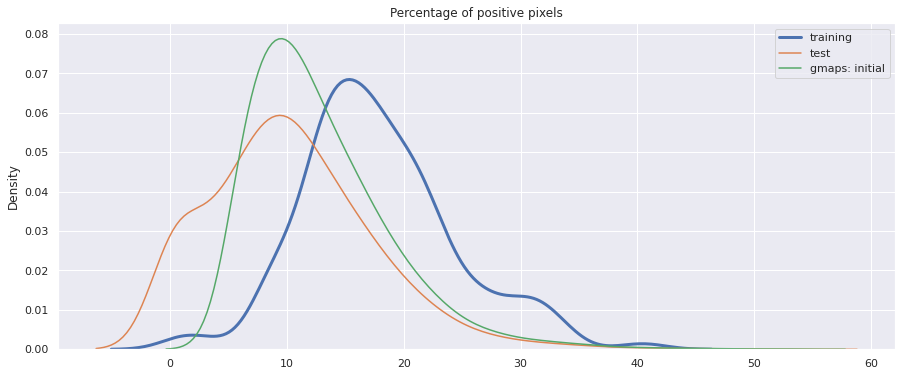

In [48]:
# Plot pos pixels
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(15, 6)})

cities = list(n_pos_pix_dict['gmaps'].keys())
cities = cities[:1] + cities[1+1:]

labels_gmaps = ['gmaps: ' + city for city in cities]

x, y = sns.kdeplot(np.array(n_pos_pix_dict['training']), bw=0.3, linewidth=3).get_lines()[0].get_data()
sns.kdeplot(np.array(n_pos_pix_dict['gmaps']['all']), bw=0.3)
sns.kdeplot(np.array(n_pos_pix_dict['gmaps']['filtered']), bw=0.3)
# for city in cities:
#     sns.kdeplot(np.array(n_pos_pix_dict['gmaps'][city]), bw=0.3)

plt.title("Percentage of positive pixels")
# plt.legend(labels=["training"] + labels_gmaps)
plt.legend(labels=["training","test","gmaps: initial", "gmaps: filtered"] + labels_gmaps)

y[100]